In [7]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [8]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        segments.append((points[ind1],points[ind2]))
        segments.append((points[ind1],points[ind3]))
        segments.append((points[ind2],points[ind3]))
    return segments

Lista wierzchołków + Lista połączeń

In [9]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        connections.append((i,ii))
        connections.append((i,iii))
        connections.append((ii,iii))
    return connections

In [10]:
con = triangles_to_connections(t)
vertex_and_connections = (p,con)

Half Edge 

In [11]:
from halfedge import *
from visualizer import *

In [16]:
p,t = triangulation_reader('1')
mesh = triangles_to_segments(p,t)
he = create_half_edge_structure(p, t)

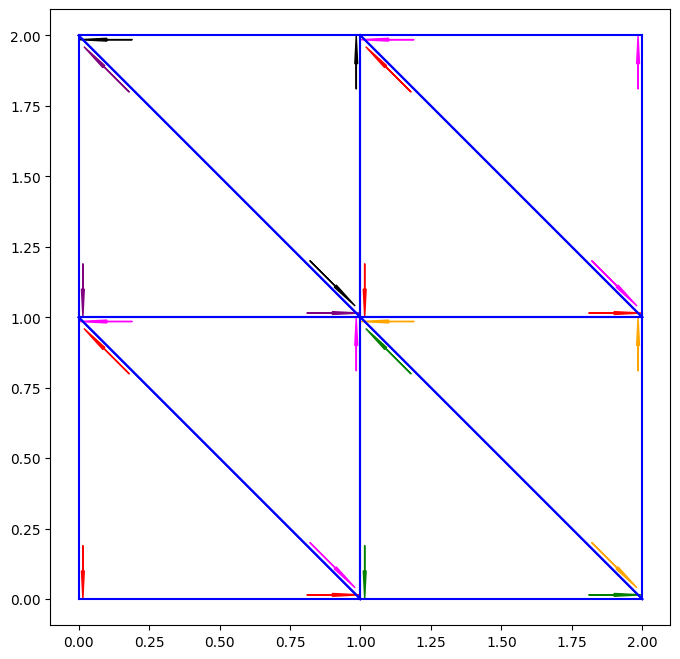

In [17]:
draw_halfedge_structure(he,mesh)